# Clustering & PCA  Assignment:

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Data Cleaning and Inspection

In [4]:
df=pd.read_csv("C:\Users\engel\Desktop\UpGrad\Predictive_analysis\Country-data.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


#  
We observed that there are  no null values in the dataset.
<br>
We observe that there is sudden spike in the data values after 99th percentile. Hence, removing the highest values of ‘GDPP’ , ’Income’ and ‘Exports’ which is usually high for developed countries.
<br>
Also,we are not removing the higher values of ‘Child Mortality’ and ‘Inflation’ because these can be high for both
Developed and Underdeveloped countries
\n
<br>
Since we have to determine poor countries, we are not removing the lower values in the dataset wherever applicable.

In [9]:
df=df.loc[df['gdpp']<=80000]
df=df.loc[df['income']<=100000]
df=df.loc[df['exports']<=125]
df.describe(percentiles=[0.05,0.25,0.50,0.75,0.9,0.95,0.97,0.99,1])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,162.000000,162.000000,162.000000,162.000000,162.00000,162.000000,162.000000,162.000000,162.000000
mean,39.299383,38.488883,6.830556,45.113370,15331.87037,7.896494,70.234568,2.988580,11322.308642
std,40.510812,20.472602,2.739030,19.181254,15521.11609,10.704519,8.834231,1.517809,15113.158525
min,2.600000,0.109000,1.970000,0.065900,609.00000,-4.210000,32.100000,1.230000,231.000000
5%,3.900000,12.020000,2.840500,17.855000,1210.50000,0.241950,55.630000,1.390500,460.150000
25%,9.025000,23.575000,4.940000,30.475000,3325.00000,1.790000,64.775000,1.845000,1310.000000
50%,20.050000,34.900000,6.270000,43.250000,9925.00000,5.415000,72.650000,2.475000,4550.000000
75%,62.200000,50.675000,8.537500,57.950000,21100.00000,11.050000,76.575000,4.037500,12825.000000
90%,100.870000,67.330000,10.990000,70.530000,40340.00000,16.690000,80.280000,5.337000,38230.000000
95%,116.000000,76.395000,11.595000,79.860000,45235.00000,20.895000,81.395000,5.868500,46865.000000


print(df.shape)

### Univariate Analysis

Text(0.5,1,'GDPP')

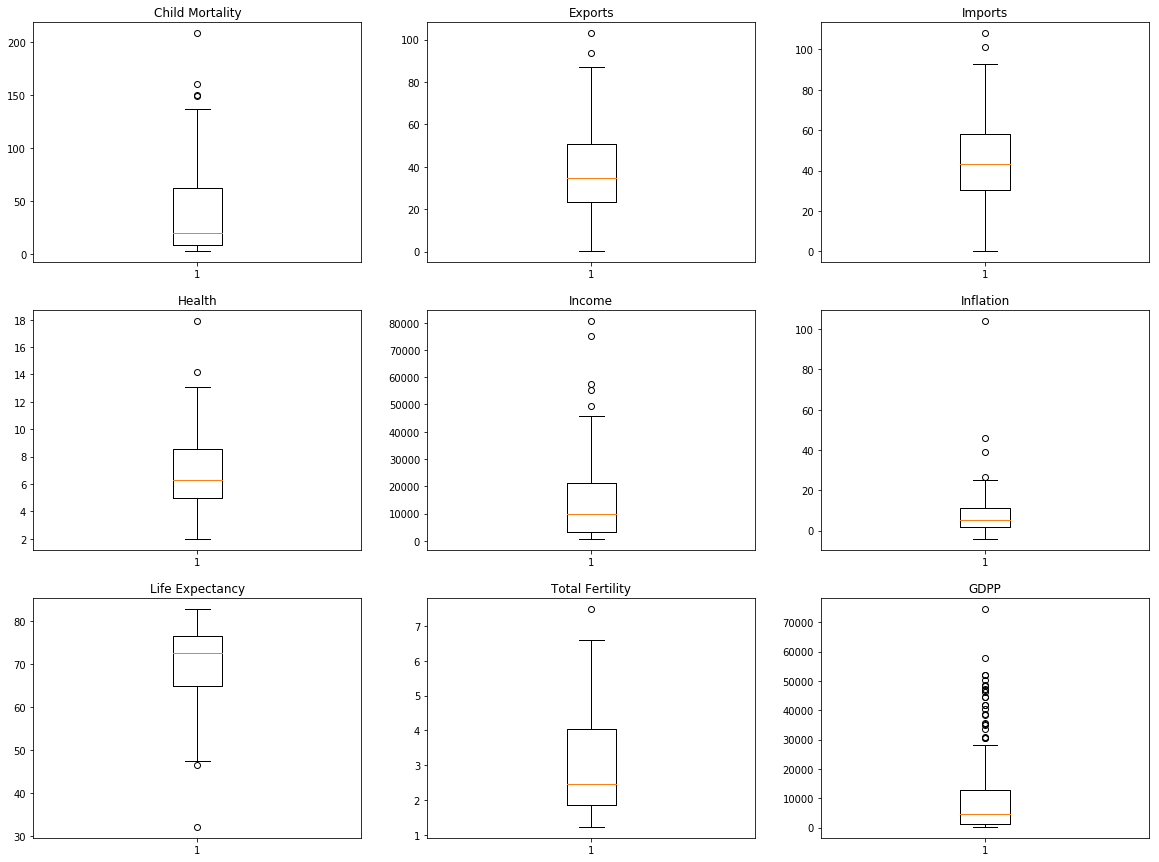

In [10]:
plt.figure(figsize=(20,15))
plt.subplot(331)
plt.boxplot(df['child_mort'])
plt.title("Child Mortality")

plt.subplot(332)
plt.boxplot(df['exports'])
plt.title("Exports")

plt.subplot(333)
plt.boxplot(df['imports'])
plt.title("Imports")

plt.subplot(334)
plt.boxplot(df['health'])
plt.title("Health")

plt.subplot(335)
plt.boxplot(df['income'])
plt.title("Income")

plt.subplot(336)
plt.boxplot(df['inflation'])
plt.title("Inflation")

plt.subplot(337)
plt.boxplot(df['life_expec'])
plt.title("Life Expectancy")

plt.subplot(338)
plt.boxplot(df['total_fer'])
plt.title("Total Fertility")

plt.subplot(339)
plt.boxplot(df['gdpp'])
plt.title("GDPP")

###  
We do not observe any abnormility in the box plot. i.e there doesn't seem to be any more outlier present.
Hence, we can proceed ahead with the dataset

### Bivariate Analysis

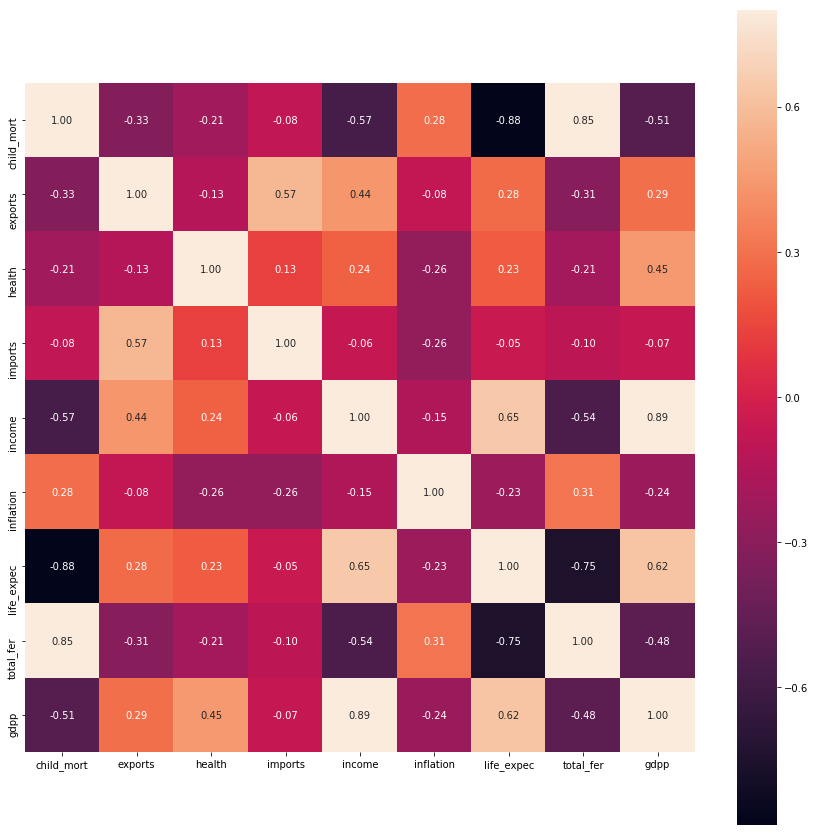

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt='.2f')
plt.show()

#  
GDPP, Life Expectancy, Health is high for countries with high income.<br>
Child Mortality is high with countries having high Fertility Rate.<br>
Also, we observe that inflation is high for countries with high fertility rate and high mortality rate.<br>
Inflation, Fertility Rate ,Child mortality is high for countries having high Income and high GDPP.<br>
Also, life expectancy is low when fertility rate is high.

### Principle Component Analysis

In [12]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [13]:
#Doing the PCA on the train data
df1=df.drop(columns=['country'])
pca.fit(df1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [14]:
comp=pd.DataFrame(pca.components_)
comp

,0,1,2,3,4,5,6,7,8
0,-0.001066,0.000366,0.000045,-0.000061,0.717584,-0.000101,0.000274,-0.000038,0.696471
1,-0.001056,0.001263,-0.000245,0.000047,0.696469,0.000412,0.000089,-0.000042,-0.717584
2,0.964512,-0.114081,-0.007643,-0.149873,0.001598,0.089154,-0.159357,0.028910,-0.000046
3,0.186502,0.656309,-0.000002,0.724335,-0.000429,-0.075621,-0.063893,0.003713,0.000460
4,-0.048472,0.629055,-0.078146,-0.490762,-0.000949,0.593212,0.054938,0.008108,0.000599
5,-0.051604,-0.393572,0.062533,0.451932,0.000219,0.796311,-0.012166,0.005209,0.000059
6,-0.170019,0.018993,0.038878,-0.058662,-0.000021,0.013629,-0.982633,-0.005098,0.000132
7,0.013871,0.072604,0.994106,-0.065892,0.000064,-0.003161,0.042288,-0.012199,-0.000171
8,0.028628,0.001207,-0.012862,-0.002166,-0.000019,0.011230,0.000031,-0.999441,0.000011


In [15]:
#Mapping the Principle Components to the orignal features and observing the weightage of eacg feature for each PC
colnames = list(df1.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'Feature':colnames})
pcs_df

,PC1,PC2,PC3,Feature
0,-0.001066,-0.001056,0.964512,child_mort
1,0.000366,0.001263,-0.114081,exports
2,0.000045,-0.000245,-0.007643,health
3,-0.000061,0.000047,-0.149873,imports
4,0.717584,0.696469,0.001598,income
5,-0.000101,0.000412,0.089154,inflation
6,0.000274,0.000089,-0.159357,life_expec
7,-0.000038,-0.000042,0.028910,total_fer
8,0.696471,-0.717584,-0.000046,gdpp


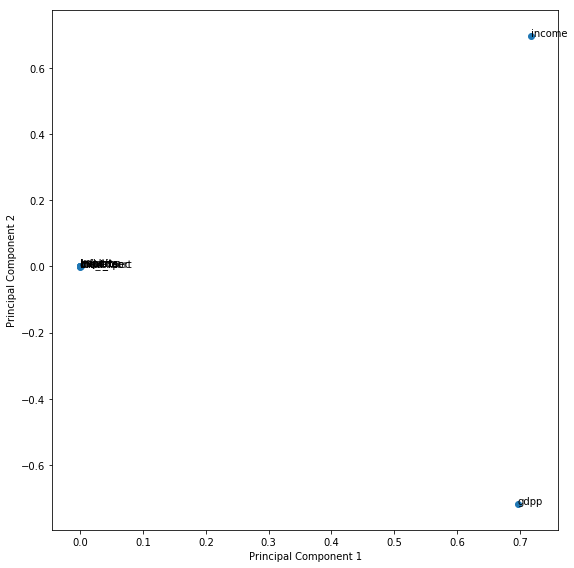

In [16]:
#observing the relation between the PCs and the original features
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [17]:
pca.explained_variance_ratio_

array([9.45979174e-01, 5.40166693e-02, 2.49203818e-06, 1.19095910e-06,
       2.77450414e-07, 1.59397297e-07, 2.67271346e-08, 8.38172320e-09,
       1.33045587e-09])

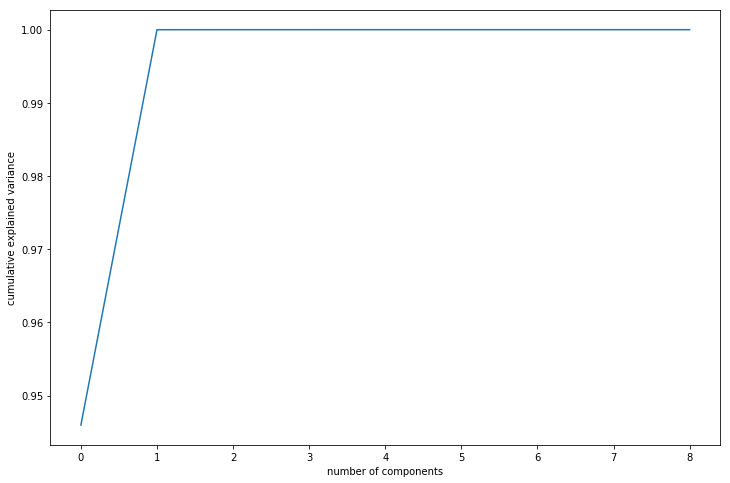

In [18]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#  
We observe that 100 % of the variance can be easily explained by the first three principle components

In [19]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=3)

In [20]:
df_train_pca = pca_final.fit_transform(df1)
df_train_pca.shape

(162, 3)

In [21]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

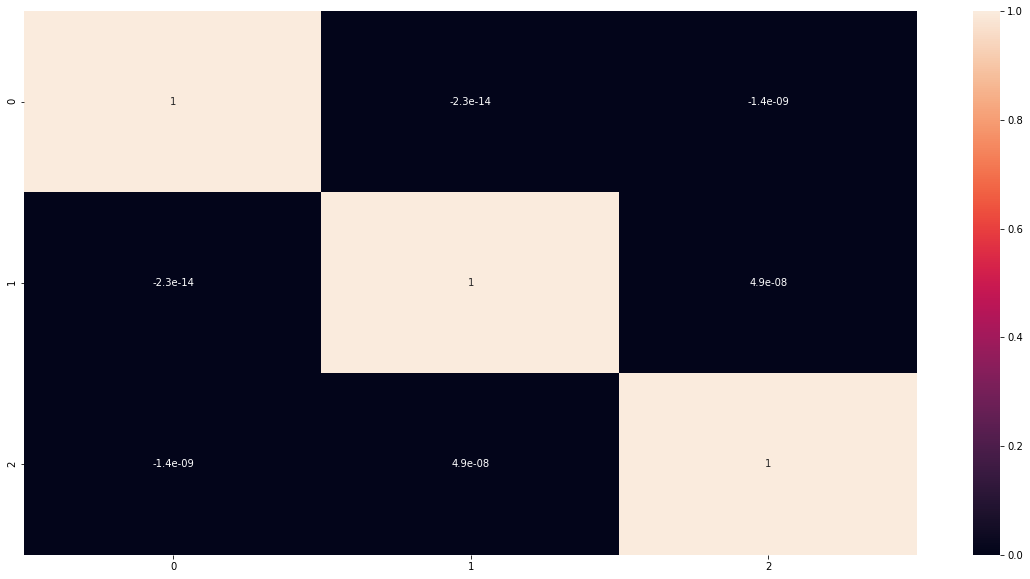

In [22]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

#  
We observe that there is zero corelation amongst the principle components as expected

In [23]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 4.907252773310301e-08 , min corr:  -1.3783078938698697e-09


In [24]:
pc=np.transpose(df_train_pca)
new_df=pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2]})

In [25]:
new_df

,PC1,PC2,PC3
0,-17347.174289,1829.064652,32.990978
1,-8913.366837,-1427.565116,-31.264305
2,-6524.456063,-3230.579293,-14.079104
3,-12195.356751,977.417564,64.125685
4,3315.271028,-1994.607485,-26.062281
5,1704.928690,-3079.397594,-13.685078
6,-11837.098072,197.741716,-33.119552
7,46967.293945,10962.257083,8.332241
8,44776.599969,6120.649142,5.348590
9,-3338.823686,-4399.372848,3.202577


##  
We have now transformed our orignal dataset consisting of 9 features into 3 prainciple components

In [26]:
#Performing K means Clustering

# standardise all parameters
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
new_df2 = standard_scaler.fit_transform(new_df)

In [27]:
new_df2 = pd.DataFrame(new_df2)
new_df2.columns = ['PC1','PC2','PC3']
new_df2.head()

,PC1,PC2,PC3
0,-0.825848,0.364399,0.968294
1,-0.424339,-0.284410,-0.917616
2,-0.310610,-0.643619,-0.413225
3,-0.580585,0.194728,1.882106
4,0.157830,-0.397380,-0.764935


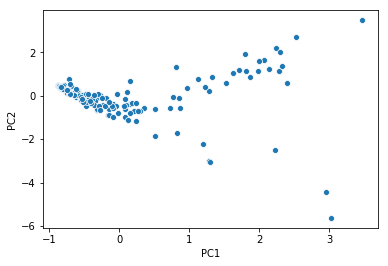

In [28]:
sns.scatterplot(x='PC1',y='PC2',data=new_df2)

### Calculating Hopkins Score

In [29]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [30]:
hopkins(new_df2)

0.8670333384516143

#   
We are getting hopkins score greater than 0.8. Hence, we can proceed ahead with this dataset for clustering

### Performing Silhouette Analysis and Elbow curve

In [31]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(new_df2)
    sse_.append([k, silhouette_score(new_df2, kmeans.labels_)])

Text(0.5,1,'Silhouette Curve')

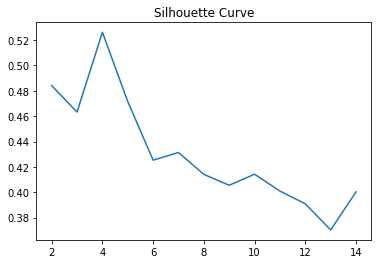

In [32]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);
plt.title('Silhouette Curve')

Text(0.5,1,'Elbow Curve')

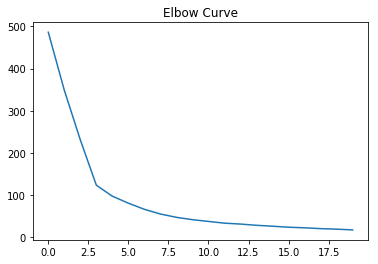

In [33]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(new_df2)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)
plt.title('Elbow Curve')

###   
With the help of silhouette curve and elbow curve, we take no of clusters equal to 4

In [34]:
# Kmeans with K=4
model_clus5 = KMeans(n_clusters = 4, max_iter=50)
model_clus5.fit(new_df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [35]:
# analysis of clusters formed
df.index = pd.RangeIndex(len(df.index))
RFM_km = pd.concat([df, pd.Series(model_clus5.labels_)], axis=1)
RFM_km.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp', 'ClusterID']


km_clusters_childm = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exp = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).exports.mean())
km_clusters_imp= 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).imports.mean())

km_clusters_health = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).health.mean())
km_clusters_inc = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).income.mean())
km_clusters_inf= 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).inflation.mean())

km_clusters_life_exp = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).life_expec.mean())
km_clusters_fer = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp= 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).gdpp.mean())

In [36]:
RFM_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [37]:
df_c = pd.concat([pd.Series([0,1,2,3]), km_clusters_childm, km_clusters_exp, km_clusters_imp,km_clusters_health,km_clusters_inc,km_clusters_inf,km_clusters_life_exp,km_clusters_fer,km_clusters_gdpp], axis=1)
df_c.columns = ["ClusterID","Child_Mortality_mean", "Exports_mean", "Imports_mean","Health_mean","Income_mean",'Inflation_mean','Life_expectancy_mean','Total_Fertility_mean','GDPP_mean']
df_c.head()

,ClusterID,Child_Mortality_mean,Exports_mean,Imports_mean,Health_mean,Income_mean,Inflation_mean,Life_expectancy_mean,Total_Fertility_mean,GDPP_mean
0,0,101.648649,25.571054,40.215295,6.356757,2490.891892,11.982027,58.827027,5.186757,1176.162162
1,1,24.415789,40.571263,48.414737,6.426526,11782.105263,7.417158,71.874737,2.436842,6446.273684
2,2,4.743478,41.408696,39.782609,10.225652,38843.478261,1.118565,80.582609,1.808261,43178.260870
3,3,25.271429,68.914286,43.714286,3.662857,54128.571429,15.077143,74.271429,2.735714,26457.142857


Text(0.5,1,'Mean GDPP')

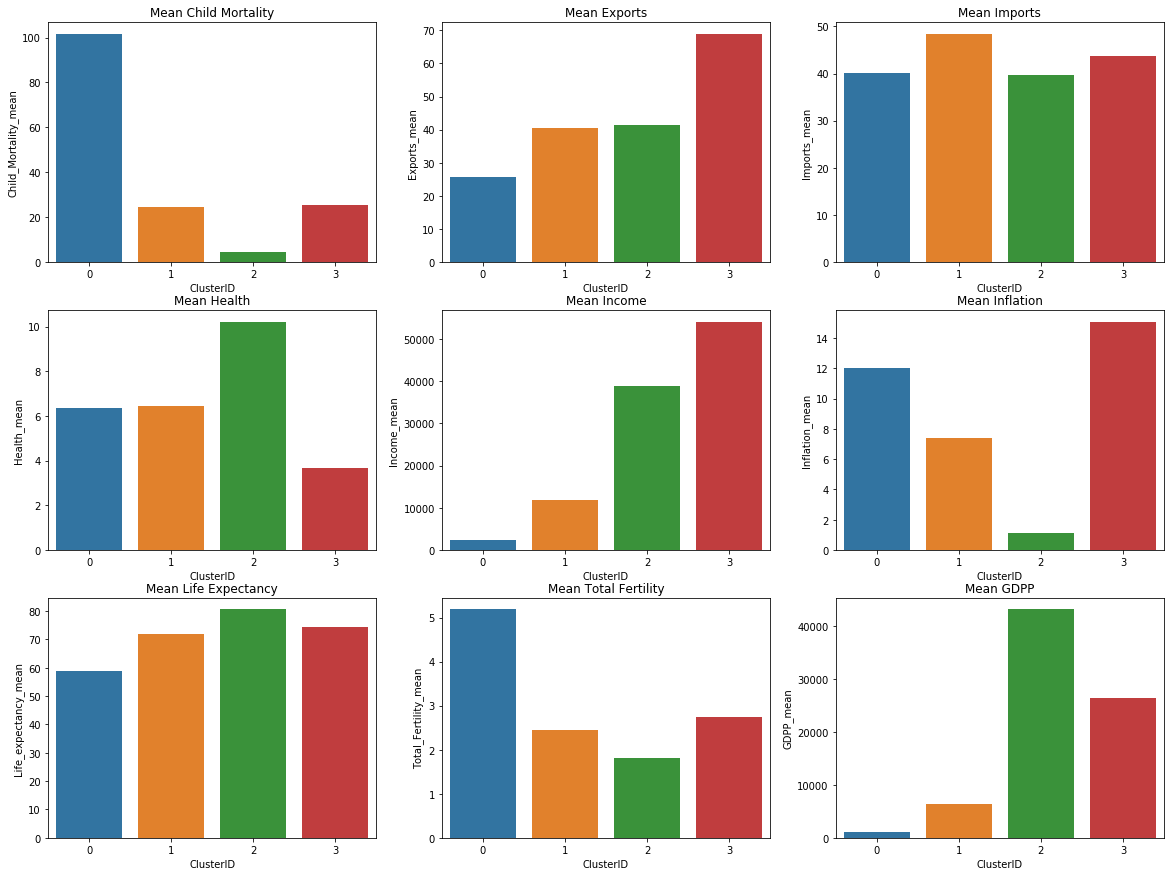

In [38]:
#plotting the mean of features for each cluster

plt.figure(figsize=(20,15))
plt.subplot(331)
sns.barplot(x=df_c.ClusterID, y=df_c['Child_Mortality_mean'])
plt.title("Mean Child Mortality")

plt.subplot(332)
sns.barplot(x=df_c.ClusterID, y=df_c['Exports_mean'])
plt.title("Mean Exports")

plt.subplot(333)
sns.barplot(x=df_c.ClusterID, y=df_c['Imports_mean'])
plt.title("Mean Imports")

plt.subplot(334)
sns.barplot(x=df_c.ClusterID, y=df_c['Health_mean'])
plt.title("Mean Health")

plt.subplot(335)
sns.barplot(x=df_c.ClusterID, y=df_c['Income_mean'])
plt.title("Mean Income")

plt.subplot(336)
sns.barplot(x=df_c.ClusterID, y=df_c['Inflation_mean'])
plt.title("Mean Inflation")

plt.subplot(337)
sns.barplot(x=df_c.ClusterID, y=df_c['Life_expectancy_mean'])
plt.title("Mean Life Expectancy")

plt.subplot(338)
sns.barplot(x=df_c.ClusterID, y=df_c['Total_Fertility_mean'])
plt.title("Mean Total Fertility")

plt.subplot(339)
sns.barplot(x=df_c.ClusterID, y=df_c['GDPP_mean'])
plt.title("Mean GDPP")

In [39]:
#finding no of countries in each cluster
cluster_count_km=RFM_km.groupby(RFM_km['ClusterID'])['ClusterID'].count()
cluster_count_km

ClusterID
0    37
1    95
2    23
3     7
Name: ClusterID, dtype: int64

In [40]:
countries=RFM_km.loc[RFM_km['ClusterID']==1]

In [91]:
countries.sort_values(by=['gdpp','income']).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,1
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,1
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,1
110,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,1
128,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,1
104,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,1
93,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,1
145,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488,1
64,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.97,55.6,5.05,547,1


### Hierarchical Clustering

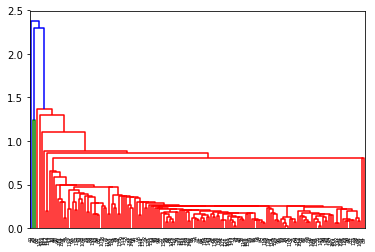

In [92]:
# heirarchical clustering
mergings = linkage(new_df2, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

#  
Based on the dendogram, we take no of clusters to be 4

In [47]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 7).reshape(-1,))
df_hc = pd.concat([df, clusterCut], axis=1)
df_hc.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp', 'ClusterID']


NameError: name 'mergings' is not defined

In [48]:
#Cluster analysis
km_clusters_childm = 	pd.DataFrame(df_hc.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exp = 	pd.DataFrame(df_hc.groupby(["ClusterID"]).exports.mean())
km_clusters_imp= 	pd.DataFrame(df_hc.groupby(["ClusterID"]).imports.mean())

km_clusters_health = 	pd.DataFrame(df_hc.groupby(["ClusterID"]).health.mean())
km_clusters_inc = 	pd.DataFrame(df_hc.groupby(["ClusterID"]).income.mean())
km_clusters_inf= 	pd.DataFrame(df_hc.groupby(["ClusterID"]).inflation.mean())

km_clusters_life_exp = 	pd.DataFrame(df_hc.groupby(["ClusterID"]).life_expec.mean())
km_clusters_fer = 	pd.DataFrame(df_hc.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp= 	pd.DataFrame(df_hc.groupby(["ClusterID"]).gdpp.mean())

NameError: name 'df_hc' is not defined

In [49]:
df_hc1 = pd.concat([pd.Series([0,1,2,3]), km_clusters_childm, km_clusters_exp, km_clusters_imp,km_clusters_health,km_clusters_inc,km_clusters_inf,km_clusters_life_exp,km_clusters_fer,km_clusters_gdpp], axis=1)
df_hc1.columns = ["ClusterID","Child_Mortality_mean", "Exports_mean", "Imports_mean","Health_mean","Income_mean",'Inflation_mean','Life_expectancy_mean','Total_Fertility_mean','GDPP_mean']
df_hc1.head()

,ClusterID,Child_Mortality_mean,Exports_mean,Imports_mean,Health_mean,Income_mean,Inflation_mean,Life_expectancy_mean,Total_Fertility_mean,GDPP_mean
0,0,101.648649,25.571054,40.215295,6.356757,2490.891892,11.982027,58.827027,5.186757,1176.162162
1,1,24.415789,40.571263,48.414737,6.426526,11782.105263,7.417158,71.874737,2.436842,6446.273684
2,2,4.743478,41.408696,39.782609,10.225652,38843.478261,1.118565,80.582609,1.808261,43178.260870
3,3,25.271429,68.914286,43.714286,3.662857,54128.571429,15.077143,74.271429,2.735714,26457.142857


Text(0.5, 1.0, 'Mean GDPP')

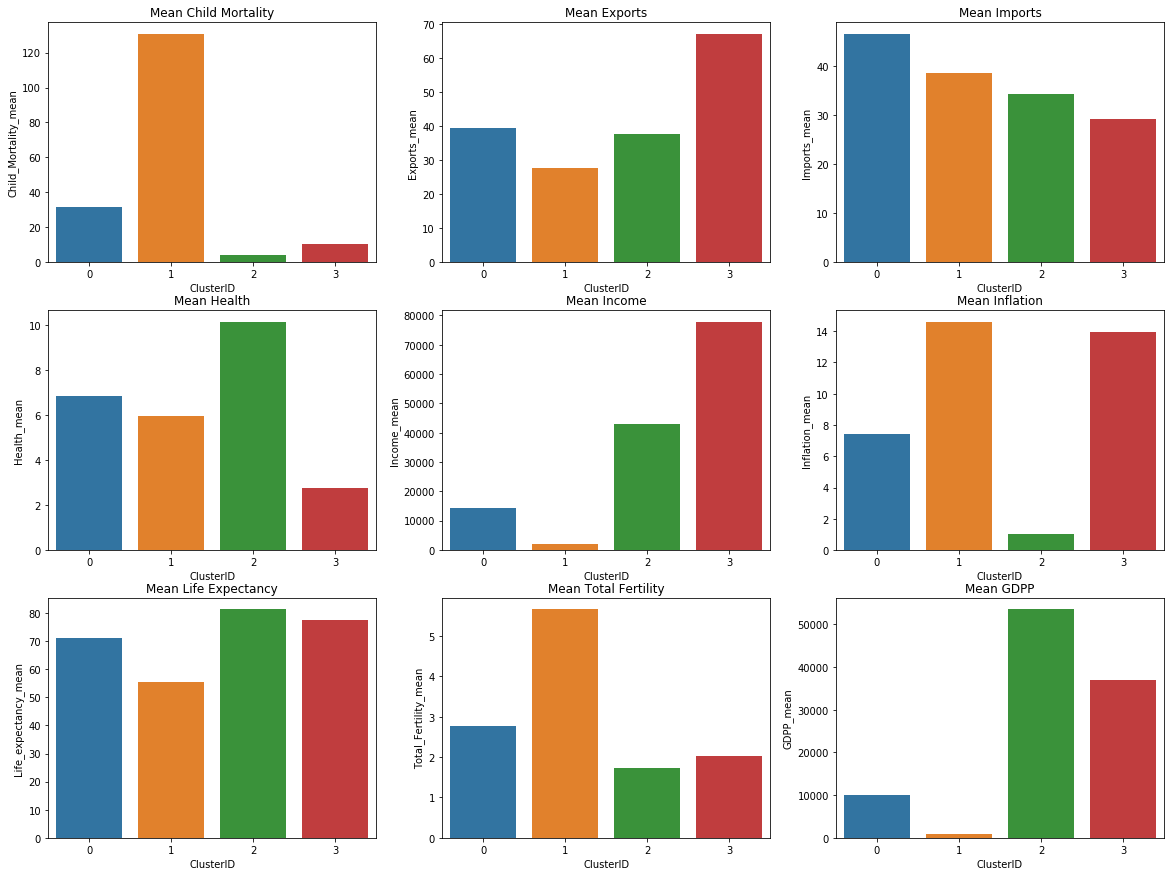

In [97]:
#Plotting the bar graph of the mean of each feature for all the clusters
plt.figure(figsize=(20,15))
plt.subplot(331)
sns.barplot(x=df_hc1.ClusterID, y=df_hc1['Child_Mortality_mean'])
plt.title("Mean Child Mortality")

plt.subplot(332)
sns.barplot(x=df_hc1.ClusterID, y=df_hc1['Exports_mean'])
plt.title("Mean Exports")

plt.subplot(333)
sns.barplot(x=df_hc1.ClusterID, y=df_hc1['Imports_mean'])
plt.title("Mean Imports")

plt.subplot(334)
sns.barplot(x=df_hc1.ClusterID, y=df_hc1['Health_mean'])
plt.title("Mean Health")

plt.subplot(335)
sns.barplot(x=df_hc1.ClusterID, y=df_hc1['Income_mean'])
plt.title("Mean Income")

plt.subplot(336)
sns.barplot(x=df_hc1.ClusterID, y=df_hc1['Inflation_mean'])
plt.title("Mean Inflation")

plt.subplot(337)
sns.barplot(x=df_hc1.ClusterID, y=df_hc1['Life_expectancy_mean'])
plt.title("Mean Life Expectancy")

plt.subplot(338)
sns.barplot(x=df_hc1.ClusterID, y=df_hc1['Total_Fertility_mean'])
plt.title("Mean Total Fertility")

plt.subplot(339)
sns.barplot(x=df_hc1.ClusterID, y=df_hc1['GDPP_mean'])
plt.title("Mean GDPP")

In [98]:
#finding no of countries in each cluster
cluster_count=df_hc.groupby(df_hc['ClusterID'])['ClusterID'].count()
cluster_count

ClusterID
0    138
1     15
2      7
3      2
Name: ClusterID, dtype: int64

In [99]:
countries=df_hc.loc[df_hc['ClusterID']==1]

In [46]:
c_set2=countries.sort_values(by=['child_mort'],ascending=False).head(5)
c_set2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
38,"Congo, Rep.",63.9,85.1,2.46,54.7,5190,20.70,60.4,4.95,2740,1
81,Kiribati,62.7,13.3,11.30,79.9,1730,1.52,60.7,3.84,1490,1
80,Kenya,62.2,20.7,4.75,33.6,2480,2.09,62.8,4.37,967,1
92,Madagascar,62.2,25.0,3.77,43.0,1390,8.79,60.8,4.60,413,1
149,Turkmenistan,62.0,76.3,2.50,44.5,9940,2.31,67.9,2.83,4440,1
